In [1]:
from hera import toolkitHome

gis_building_tk = toolkitHome.getToolkit(toolkitName=toolkitHome.GIS_BUILDINGS)

In [2]:
from hera.utils.logging import initialize_logging,with_logger
initialize_logging(
          with_logger("hera.measurements.GIS.vector.buildings.analysis", handlers=['console'], level='INFO', propagate=False)
    )

In [3]:
gis_building_tk.getDataSourceList()

['BNTL']

### getBuildingsFromRectangle

In [4]:
from hera.measurements.GIS.utils import WSG84,ITM,convertCRS

north_tel_aviv_buildings = gis_building_tk.getBuildingsFromRectangle(minx=180000, miny=668000, maxx=183000, maxy=670500 , inputCRS=ITM)
north_tel_aviv_buildings

,UNIQ_ID,PARENT,FCODE,FTYPE,HI_PNT_X,HI_PNT_Y,HI_PNT_Z,HEIGHT,HT_LAND,FNAME,...,BLDG_HT,ADDR_ID,ADDR_COUNT,USG_ID,CMPLX_ID,CMLX_FCD,ORIG_AREA,SHAPE_Leng,SHAPE_Area,geometry
0,51662710,4045779,201,11,181527.765627,668513.934994,48.90,42.420,31.48,None,...,10.940,53899844,1,0,54446777,251,5545.413150,480.027290,5545.413150,"POLYGON ((181497.300 668484.380, 181488.500 66..."
1,53183368,4045109,201,11,181037.685627,668802.330094,21.70,20.000,13.27,None,...,6.730,53696199,5,54001440,0,0,3766.161650,282.160516,3766.161650,"POLYGON ((180967.880 668759.000, 180961.720 66..."
2,51662378,4046436,201,11,181040.672127,668251.141494,20.61,19.500,17.02,None,...,2.480,53700122,3,53988238,60590888,251,3068.145250,375.792577,3068.145250,"POLYGON ((181040.800 668212.880, 180996.300 66..."
3,51662411,4043929,201,11,183025.576627,669250.286294,36.38,32.455,19.17,None,...,13.285,0,0,0,54447761,251,4551.408400,361.256724,4551.408400,"POLYGON ((182987.910 669226.810, 182976.090 66..."
4,51662441,4044930,201,11,181510.795027,668875.254394,41.29,32.050,21.14,None,...,10.910,0,0,0,54446171,251,3066.480000,229.180000,3066.480000,"POLYGON ((181532.090 668834.810, 181489.500 66..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,64751837,0,201,11,0.000000,0.000000,0.00,0.000,0.00,None,...,0.000,0,0,0,54446187,251,1606.780635,166.626180,1606.780635,"POLYGON ((182063.327 668012.156, 182038.720 66..."
2553,64750892,0,201,11,0.000000,0.000000,0.00,0.000,0.00,None,...,0.000,0,0,0,51592690,151,42.428500,30.779423,42.428500,"POLYGON ((179988.974 668134.125, 179989.523 66..."
2554,64751446,0,201,11,0.000000,0.000000,0.00,0.000,0.00,None,...,0.000,0,0,0,54446559,251,421.084248,90.910951,421.084248,"POLYGON ((182764.202 669901.553, 182741.977 66..."
2555,64751447,0,201,11,0.000000,0.000000,0.00,0.000,0.00,None,...,0.000,0,0,0,0,0,149.703559,49.275173,149.703559,"POLYGON ((182500.005 669240.735, 182493.909 66..."


### LambdaFromBuildingData

You can meassure the lambdas for a squares of GIS geopandas. Deafault it true of cache option:

In [5]:
north_tel_aviv_buildings.crs = ITM
north_tel_aviv_buildings_lambdas = gis_building_tk.analysis.LambdaFromBuildingData(23,500,north_tel_aviv_buildings)
north_tel_aviv_buildings_lambdas

INFO    : analysis.py/LambdaFromBuildingData(113) --- Start ---
INFO    : analysis.py/LambdaFromBuildingData(138) Check if cached data exists for data {'bounds': array([179902.00002654, 667938.4999939 , 183074.80002654, 670563.4999939 ]), 'wind': 23, 'resolution': 500, 'crs': 2039}
INFO    : analysis.py/LambdaFromBuildingData(176) ---- End ----


,lambdaP,lambdaF,hc,i0,j0,geometry
0,0.082781,0.077146,16.587096,0,0,"POLYGON ((180402.000 667938.500, 180402.000 66..."
1,0.045804,0.056140,21.652310,0,1,"POLYGON ((180402.000 668438.500, 180402.000 66..."
2,0.113593,0.199018,32.050530,0,2,"POLYGON ((180402.000 668938.500, 180402.000 66..."
3,0.015242,0.023897,27.851290,0,3,"POLYGON ((180402.000 669438.500, 180402.000 66..."
4,0.000000,0.000000,0.000000,0,4,"POLYGON ((180402.000 669938.500, 180402.000 67..."
5,0.000000,0.000000,0.000000,0,5,"POLYGON ((180402.000 670438.500, 180402.000 67..."
6,0.113938,0.117305,13.340440,1,0,"POLYGON ((180902.000 667938.500, 180902.000 66..."
7,0.166829,0.162258,16.557517,1,1,"POLYGON ((180902.000 668438.500, 180902.000 66..."
8,0.181426,0.199902,20.165166,1,2,"POLYGON ((180902.000 668938.500, 180902.000 66..."
9,0.144462,0.165506,23.097431,1,3,"POLYGON ((180902.000 669438.500, 180902.000 66..."


You can also meassure the lambdas for a squares of GIS geopandas with the default datasource.

In [6]:
gis_building_tk.getConfig()['defaultBuildingDataSource']

'BNTL'

If you wish to not use caching, simply use cache=False.

### buildingsGeopandasToSTLRasterTopography

In [18]:
import os

current_file = os.path.dirname(os.path.abspath(os.getcwd())) + '/Landcover/STL.stl'

In [19]:
gis_building_tk.buildingsGeopandasToSTLRasterTopography(datasource.iloc[1:5],'HEIGHT','HI_PNT_Z',current_file)

In [26]:
sqaure = gis_building_tk.analysis.LambdaFromBuildingData(23,12,datasource.iloc[1:2])['geometry'].iloc[0]

INFO    : analysis.py/LambdaFromBuildingData(113) --- Start ---
INFO    : analysis.py/LambdaFromBuildingData(138) Check if cached data exists for data {'bounds': array([184801.50002654, 675301.8099939 , 184885.80002654, 675362.8099939 ]), 'wind': 23, 'resolution': 12, 'crs': 2039}
INFO    : analysis.py/LambdaFromBuildingData(176) ---- End ----


In [31]:
sqaure.exterior.coords.xy

(array('d', [184813.50002653955, 184813.50002653955, 184801.50002653955, 184801.50002653955, 184813.50002653955]),
 array('d', [675301.8099938995, 675313.8099938995, 675313.8099938995, 675301.8099938995, 675301.8099938995]))

## Convex Hull Plot

<Axes: >

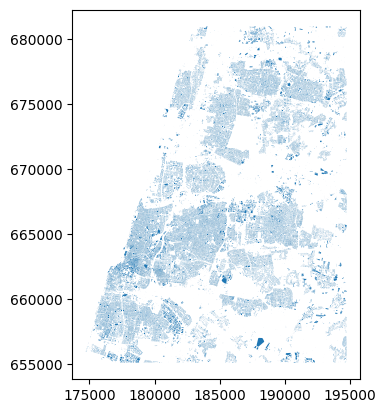

In [12]:
import geopandas as gpd

# Assuming your GeoDataFrame 'gdf' is already loaded with a 'geometry' column
datasource['convex_hull'] = datasource['geometry'].convex_hull

# Extract the coordinates of the convex hull
datasource['hullS_coords'] = datasource['convex_hull'].apply(lambda x: list(x.exterior.coords))

# Optional: Plot the original buildings and their convex hulls
datasource.set_geometry('convex_hull').plot()

In [13]:
datasource['hullS_coords']

0         [(179000.91002653955, 658933.1899938995), (178...
1         [(184877.30002653957, 675301.8099938995), (184...
2         [(190143.39002653956, 664286.8799938995), (190...
3         [(178607.45672653956, 663849.9666938995), (178...
4         [(180154.30002653957, 663212.8799938995), (180...
                                ...                        
156674    [(185490.34462653956, 673139.9937938995), (185...
156675    [(184309.78772653957, 675243.8870938995), (184...
156676    [(176530.83382653957, 662209.1784938995), (176...
156677    [(183854.20002653956, 671397.1899938995), (183...
156678    [(178399.30002653957, 662644.4999938995), (178...
Name: hullS_coords, Length: 156679, dtype: object

In [13]:
list(gis_building_tk.analysis.LambdaFromBuildingData(23,12,datasource.iloc[1:2]).iloc[0]['geometry'].exterior.coords)

INFO    : analysis.py/LambdaFromBuildingData(113) --- Start ---
INFO    : analysis.py/LambdaFromBuildingData(138) Check if cached data exists for data {'bounds': array([184801.50002654, 675301.8099939 , 184885.80002654, 675362.8099939 ]), 'wind': 23, 'resolution': 12, 'crs': 2039}
INFO    : analysis.py/LambdaFromBuildingData(176) ---- End ----


[(184813.50002653955, 675301.8099938995),
 (184813.50002653955, 675313.8099938995),
 (184801.50002653955, 675313.8099938995),
 (184801.50002653955, 675301.8099938995),
 (184813.50002653955, 675301.8099938995)]